# processing steps from `ApRESdefs.FormProfile`

A few plots showing intermediate steps in the function which performs the fft on the chirps to get profiles.

In [1]:
d1 = "DATA2022-05-26-1536.DAT"
d2 = "DATA2022-09-22-2220.DAT"
folder = "/Users/jkingslake/Documents/data/ApRES_greenland/two_examples/"

In [2]:
import sys
sys.path.append("/Users/jkingslake/Documents/science/ApRES/phase-sensitive-radar-processing/code/ApRES_Python_Nicholls_2021")

In [15]:
import ApRESDefs
#import importlib
#importlib.reload(ApRESDefs) 
#import ApRES_plot
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import xarray as xr
import math

In [16]:
Chirp_1_0_0 = ApRESDefs.DataFileObject(folder + d1).ExtractBurst(0).ExtractChirp([1])

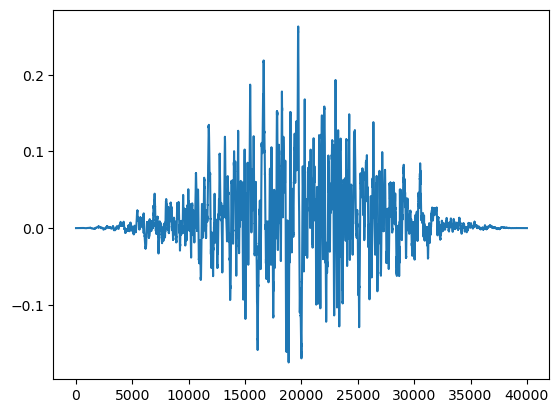

In [22]:
Nt = len(Chirp_1_0_0.vdat)
Nt = math.floor(Nt/2) * 2
plt.plot(np.multiply(Chirp_1_0_0.vdat[0:Nt],np.blackman(Nt)))

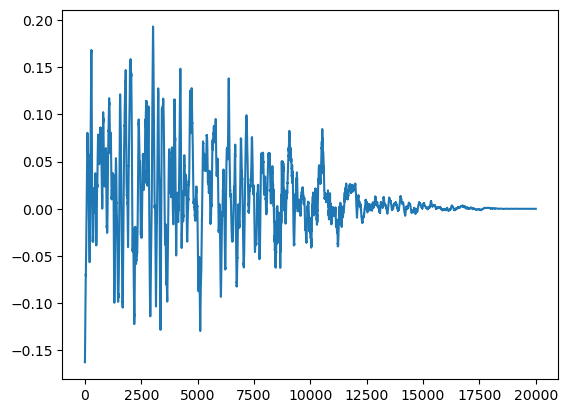

In [23]:
winchirp = np.multiply(Chirp_1_0_0.vdat[0:Nt],np.blackman(Nt))
plt.plot(winchirp[math.floor(Nt/2):-1])

80000


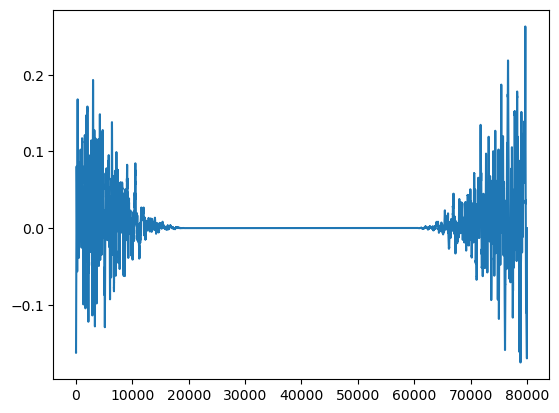

In [24]:
pad =2
Nfft = math.floor(Nt*pad)
print(Nfft)
padchirp = np.zeros(Nfft)
padchirp[0:math.floor(Nt/2)-1] = winchirp[math.floor(Nt/2):-1]
padchirp[-math.floor(Nt/2):-1] = winchirp[0:math.floor(Nt/2)-1]
plt.plot(padchirp)

/Users/jkingslake/opt/anaconda3/envs/conda_main_env_4/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


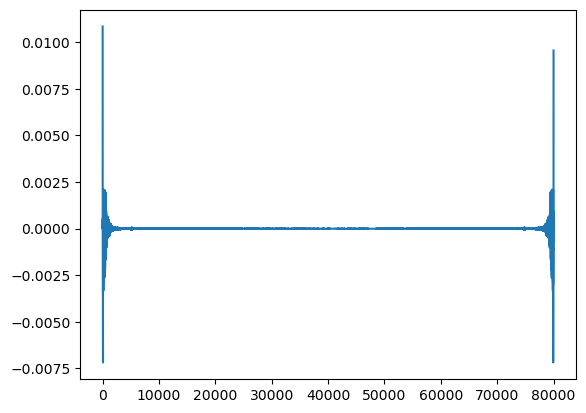

In [25]:
plt.plot(np.fft.fft(padchirp)/Nfft * math.sqrt(2*pad) )

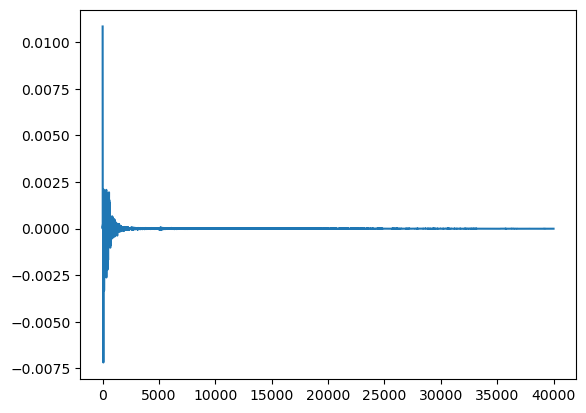

In [26]:
p = np.fft.fft(padchirp)/Nfft * math.sqrt(2*pad)
plt.plot(p[0:math.floor(Nfft/2)-1])